<a href="https://www.kaggle.com/code/ersevenkaratas/global-al-hub-veri-analizi-e-itimi-projesi?scriptVersionId=209087731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


## 0. Veri Setinin Hazırlanması

**Veri Seti ve Adresi**

E-Commerce Data : https://www.kaggle.com/datasets/carrie1/ecommerce-data/data


**Kütüphanelerimizi Yükleyelim.**

Python'da Pandas ve Numpy kütüphanelerini kullanacağım. Pandas ve Numpy kütüphaneleri Kaggle ile otomatik şekilde yüklenmiştir.

Ben sadece görselleştirme kütüphanelerini import edeceğim.

**Görselleştirme Kütüphaneleri:**
Matplot,
Seaborn,
Bokeh,
Missingno

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show


In [3]:
!pip install missingno
import missingno as msno

In [4]:

# ISO-8859-1 kullanarak dosyayı oku
df_ = pd.read_csv(filepath_or_buffer="/kaggle/input/ecommerce-data/data.csv", encoding="ISO-8859-1")

df = df_.copy()

**!!** Yukarıda csv dosyasını pandas ile okuturken problem yaşadım ve okumadı. Biraz araştırdıktan sonra dil desteğinden olduğunu öğrendim ve encoding="ISO-8859-1" ile okuma işlemi yaptırdım. 

Veri setimizle çalışma yapmak için notbook içerisine dahil ediyoruz ve ana verimizde sıkıntı yaşamamak için kopyası ile çalışmaya özen gösteriyoruz.

In [5]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

Yukarıdaki kodlar ile verimizde rastegele eksik değerler(NaN) oluşturduk. Bunu neden yaptık öğrenebildiğim kadarı ile NaN değerler oluşturarak veri analtiği yaparken verimizi eksik değerler olurken de test etmek, verini dayanıklılığını kontrol etmek ve gerçekçiliği artırmak için yapıyoruz.

## 1. Veriye İlk Bakış 

In [6]:
#Verimizin ilk 3 satırını görüyoruz.
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom


Yukarıda verimizin ilk 3 satırını gördük. Buradan kolon adlarımızı, kolonlar altındaki değerler gibi birçok gözleme ulaşabiliriz.
Sırası ile;
* Fatura numarası
* Stok kodu
* Ürün Adı(Tanımı)
* Miktar
* Fatura tarihi
* Birim Fiyatı
* Müşteri ID
* Ülke

Toplam 8 adet sütun vardır.

In [7]:
#Verimizin son 3 satırını görüntüleme.
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3.0,12/9/2011 12:50,4.95,12680.0,France


Yukarıda verimizin son 3 gözlemini görüyoruz. Buradan toplam kaç satırımız olduğunu anlayabiliriz.541908 satırımız var gözlemlerimiz 0 dan başladığı için toplam gözlemimiz 541909'dur. Bunu öğrenmenin daha kolay yolları var ileride öğreneceğiz.

In [8]:

df.shape

(541909, 8)

*.shape* kullanarak daha kolay bir şekilde verimizin satır ve sütun sayılarını görebiliriz.

In [9]:
#Kolonları yazdırma
print(list(df.columns), '\n') #kolon isimlerimizi liste şeklinde yazdıracağız

#len() fonksiyonu ile toplam kolon saysı bulma 
print(f"Veri setimizde toplam {len(df.columns)} adet kolon vardır.\n")

#type() fonksiyonu kullanma 
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'] 

Veri setimizde toplam 8 adet kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



Yukarıda görüldüğü üzere veri setimizin kolon isimlerini, toplam kolon sayımızı ve çıktılarımızın tiplerini görebiliriz.

Bizim veri kolonumuzun veri tipi **index** veri tipidir.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526028 non-null  object 
 1   StockCode    525892 non-null  object 
 2   Description  524325 non-null  object 
 3   Quantity     526113 non-null  float64
 4   InvoiceDate  525810 non-null  object 
 5   UnitPrice    526019 non-null  float64
 6   CustomerID   394717 non-null  float64
 7   Country      525826 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


.İnfo() methodu ile verimizin kısa özet bilgisini aldık.

Verimiz Pandas DataFrame tipindedir. 541909 gözlemi vardır.

Veri tiplerimiz ise float64 olarak 3, object olarak 5 adettir. 

Burada her kolonumuzda kaç eksik olmayan(non-null) değer olduğunu görebiliriz. 

6. sütunümüzda(CustomerID) fazla bi eksik değer olduğunu görüyoruz.

In [11]:
df.dtypes #sadece değişkenleri ve tiplerini görmek için.

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

Yukarıda yazdığımız kodlarla verilerimi kategorik ve numarik olarak ayırdık. Bunu yapmamızın sebebi kategorik ve numarik verileri ayırt edip bunlarla bağzı yorumlama işlemlerini ve değişim işlemlerini yapabilmek.

In [13]:
print(categorical_features, numerical_features)

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'] ['Quantity', 'UnitPrice', 'CustomerID']


In [14]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    526028 non-null  category
 1   StockCode    525892 non-null  category
 2   Description  524325 non-null  category
 3   Quantity     526113 non-null  float64 
 4   InvoiceDate  525810 non-null  category
 5   UnitPrice    526019 non-null  float64 
 6   CustomerID   394717 non-null  float64 
 7   Country      525826 non-null  category
dtypes: category(5), float64(3)
memory usage: 19.3 MB


In [16]:
df['Country'][:6]

0    United Kingdom
1    United Kingdom
2    United Kingdom
3    United Kingdom
4    United Kingdom
5    United Kingdom
Name: Country, dtype: category
Categories (38, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']

Yukarıdaki tabloya yorum yapacak olursak ilk 6 gözlemimizde görüldüğü üzere "United Kingdom" ülkesi çoğunlukta yorumunu yapabiliriz. Bununla beraber altta yazılı olan ülkelerinde verimizde dahil olduğunu görüyoruz.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526113.0,9.548825,221.218522,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,526019.0,4.621448,97.707221,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,394717.0,15287.700910,1713.806824,12346.00,13952.00,15152.00,16791.00,18287.0


**.describe** fonksiyonu ile verimizin betimsel istatisklerine bakıyoruz. 

* İlk olarak CustomerID ye bakacak olursak ortalamasının çok yüksek olduğunu görüyoruz buda bize çok fazla aykırı değer olduğunu gösterebilir. Ancak CustomerID de aykırı değerler olması önemli değildir sadece bize kimlik bildirir.
* UnitPrice'e baktığımızda ise standart sapmasının yine biraz yüksek olduğunu görüyoruz. Min ve Max değerlerine bakınca min değerinde "-" olması bize fiyatta yanlışlıklar olabileceiğini gösteriyor.
* Quantity'e baktığımızda ise standart sapmasının daha ortlamadan baya yüksek ve uzak olduğunu görüyoruz. Bu bize ürün miktarları arasında fazla aykırılık olduğunu düşündürebilir.

Yine hepsini max min değerlerini ve yüzdelik dağılımlarını bu tabloda inceleyebiliriz.

## 2. Eksik Veri Analizi

In [18]:
df.isna().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice       15890
CustomerID     147192
Country         16083
dtype: int64

Yukarıdaki tablomuzada gözlemlerde ne kadar eksik değerler var bunların toplamlarını görüyoruz. Tabloda da görüldüğü gibi CustomerID'de oldukça bir aykırılık gözüküyor. Buradan çıkaracağımız sonuç ise CustomerID'de oldukça fazla eksik değerimiz vardır.

In [19]:
df.isna().sum().sum()

#Bu işlemde yukarda gördüğümüz eksik değerlerin toplamdır.

260542

Yukarıdaki toplam eksik değer sayısına bakınca da oldukça fazla eksik değer olduğunu görebiliyoruz. Bunun ile eksik verileri doldurmamız mı gerekecek yoksa silememiz mi gerekecek onu belirleyebiliriz. Buna ileride ortlamalarına standart sapmalarına eğilimlerine gibi birçok değerlerine bakarak karar vereceğiz. 

In [20]:
print(f"Veri setimizde toplam {df.notnull().sum().sum()} adet eksiksiz, {df.isna().sum().sum()} eksik değer vardır.")

Veri setimizde toplam 4074730 adet eksiksiz, 260542 eksik değer vardır.


In [21]:
df[df.isnull().any(axis = 1)][6:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39,536370,NaN,RED TOADSTOOL LED NIGHT LIGHT,24.0,12/1/2010 8:45,1.65,12583.0,France
45,536370,POST,POSTAGE,NaN,12/1/2010 8:45,18.00,12583.0,France
51,NaN,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 9:02,2.75,17850.0,United Kingdom
53,NaN,37370,RETRO COFFEE MUGS ASSORTED,6.0,NaN,1.06,17850.0,United Kingdom
54,NaN,21871,SAVE THE PLANET MUG,6.0,NaN,NaN,17850.0,United Kingdom
56,536373,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6.0,12/1/2010 9:02,NaN,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,NaN,3.39,17850.0,United Kingdom
73,536375,21068,VINTAGE BILLBOARD LOVE/HATE MUG,6.0,12/1/2010 9:32,1.06,17850.0,NaN
87,536378,85099C,NaN,10.0,12/1/2010 9:37,1.95,14688.0,United Kingdom
89,536378,20723,STRAWBERRY CHARLOTTE BAG,10.0,NaN,0.85,14688.0,United Kingdom


In [22]:
df[df.notnull().any(axis = 1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,NaN,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,NaN,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


Yukarıda iki adet tablo görüyoruz. Bu ilk tabloda çıkan sonuçlar en az 1 boş değer bulunduran altta ise en az 1 boş değer bulundurmayan yani hiç boş değeri olmayan sonuçları görüyoruz. Bu tablolara göre hangi saatelerde daha az hata yapılmış hangi sattlerde çok hata yapılmış saptayabiliriz.

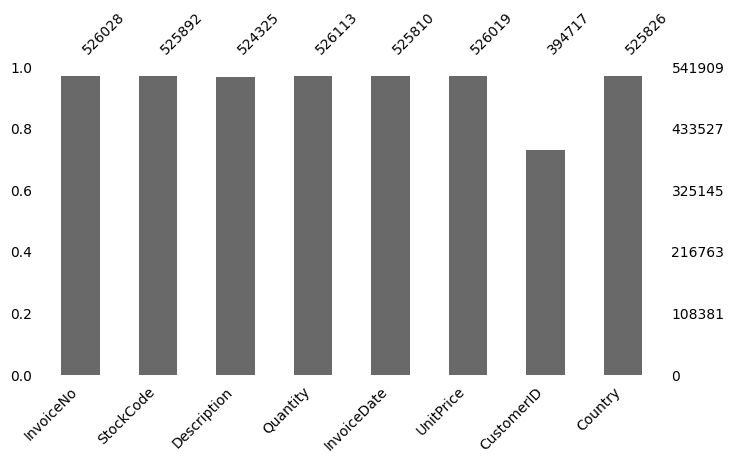

In [23]:
msno.bar(df = df,
         figsize=(8,4),
         fontsize=10);
#Missingno görselleştirme kütüphanesi ile eksik değerlerimizi görsel olarak kolayca görebiliriz.

Yukarıdaki bar görseline bakarak bazı yorumlar yapabiliriz.

Kodun içinde de dediğimiz gibi missingno bar bize eksik değerlerimizi ne kadar çok ne kadar az olduğunu gösterir.

Buna göre Çoğu kolonumuzun 1 e yakın olduğunu yani eksik değerlerinin az olduğunu ancak CustomerID'de eksik (NaN) değerlerinin diğerlerine göre fazla olduğunu görüyoruz. En fazla eksik değer burda olduğu için müşteriler alım yaparken ID vermemiş veya satıcı girmemiş olabilir.

Bu yorumu çıkarabiliriz.

Aşağıda çeşitli fonksiyonlar ile görseller ile incelemeler yapabiliriz.

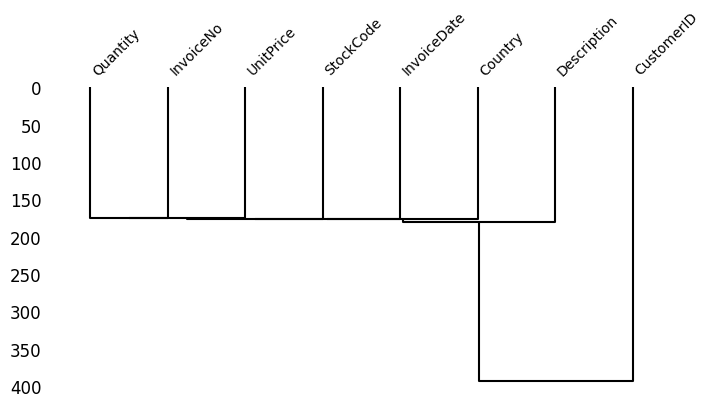

In [24]:
msno.dendrogram(df = df,
         figsize=(8,4),
         fontsize=10);

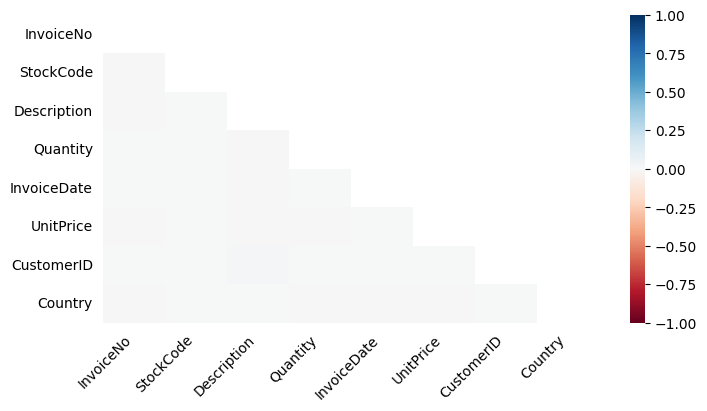

In [25]:
msno.heatmap(df = df,
         figsize=(8,4),
         fontsize=10);

### 2.1 Eksik Verilerin Silinmesi 

Eksik verilerin silinmesi eksik verilerle mücahadele etme yollarından birisidir. Ancak veri silme işlemi yaparken çok dikkatli olmalıyoz. Elimizdeki tüm verileri de yanlışlıkla silme ihtimalimiz vardır.


In [26]:
df.dropna(inplace = False)[:8]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom


In [27]:
df[:8]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,NaN,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom


Yukarıda iki tablo görüyoruz. İlk tablomuzda .dropna fonksiyonu ile verimizi kalıcı olmayacak şekilde eksik veriyi sildik. Aşağıdaki tablo ile yukadaki tabloyu karşılaştırdığımızda InvoceNo'su 536365 nolu gözlemimizi sildiğimizi görebiliyoruz. Bu silme işlemi ile beraber ortalamalarımız, standart sapma gibi merkezi eğilim ölçülerimiz iyi yönde etkilenecektir.

In [28]:
df.dropna(how='all')[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,NaN,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


## 2.2 Eksik Verilerin Doldurulması  

Eksik verileri doldururken silme işleminde gösterdiğimiz titizliği göstermemiz gerekir. Doldurma işlemi yaparken işlem yapcağımız kolonun ortalmasını, standart sapmasını, çarpıklığını, basıklık gibi birçok değeri kontrol ederek doldurma işlemi yapmamız gerek. Rastgele bakmadan doldurma işlemleri yaptığımızda o veri setinin yapsını bozabilir bununla beraber yanlış yorumlarda bulunabiliriz.

In [29]:
df_fillna = df.copy()


In [30]:
df_fillna.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,NaN,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


Doldurma işlemi yaparken veri bozulmalarına karşı vs. korunmak için verinin asıl kendisi ile değil ilk önce kopyası ile çalışma yapıyorum.

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526113.0,9.548825,221.218522,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,526019.0,4.621448,97.707221,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,394717.0,15287.700910,1713.806824,12346.00,13952.00,15152.00,16791.00,18287.0


In [32]:
mean_UnitPrice = df_fillna['UnitPrice'].mean()

df_fillna['UnitPrice'].fillna(value=mean_UnitPrice, inplace= True)

/tmp/ipykernel_17/197835672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['UnitPrice'].fillna(value=mean_UnitPrice, inplace= True)


Yukarıda yazdığımız kodlar ile UnitPrice kolonunda boş olan değerleri o kolonun ortalaması ile boş değerlerimizi yok ettik. Bu işlemle beraber UnitePrice kolonunu daha sağlıklı yorumlayabiliriz.


In [33]:
df_fillna.isna().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice           0
CustomerID     147192
Country         16083
dtype: int64

Yukarda ise bu yaptığımız dolum işleminin kontrollerini sağladım.

In [34]:
mean_Quantity = df_fillna['Quantity'].mean()

df_fillna['Quantity'].fillna(value=mean_Quantity, inplace= True)


mean_CustomerID = df_fillna['CustomerID'].mean()

df_fillna['CustomerID'].fillna(value=mean_CustomerID, inplace= True)


/tmp/ipykernel_17/3790587342.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Quantity'].fillna(value=mean_Quantity, inplace= True)
/tmp/ipykernel_17/3790587342.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [35]:
df_fillna.isna().sum()

InvoiceNo      15881
StockCode      16017
Description    17584
Quantity           0
InvoiceDate    16099
UnitPrice          0
CustomerID         0
Country        16083
dtype: int64

In [36]:
df_fillna.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.548825,217.970545,-80995.00,1.00,4.00000,10.00,80995.0
UnitPrice,541909.0,4.621448,96.264062,-11062.06,1.25,2.10000,4.15,38970.0
CustomerID,541909.0,15287.700910,1462.653491,12346.00,14426.00,15287.70091,16187.00,18287.0


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,526113.0,9.548825,221.218522,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,526019.0,4.621448,97.707221,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,394717.0,15287.700910,1713.806824,12346.00,13952.00,15152.00,16791.00,18287.0


Yukarıda gördüğünüz iki tabloyu karşılaştırdığımızda doldurmadan önce ve doldurmadan sonra ne gibi farklar olmuş;

* Standart sapmalarımız gözle görülür bir şekilde düşüş yaşamış ve bu bize daha karalı bir veri seti sağlamakta.
* Sayılarına baktığımızda ise hepsini tam olarak dolu olduğunu eksik değer olmadığını görebiliyoruz.
* Yüzdelik dilimlerde artış olduğunu görüyoruz bu şu anlama geliyor; medyanındaki(%50) artış bize dolum yaptıktan sonra ürünlerin miktarında artış olduğunu gösteriyor.
* Birim fiyatların %75 lik çeyrekliğine baktığımızda dolumdan önce 4.13'lük olan dilim dolumdan sonra 4.15'e çıkmıştır. Bu da boş değerlere dolum yapıldığı için fiyatlar %75'lik çeyrekte 4.15 veya daha azdır.

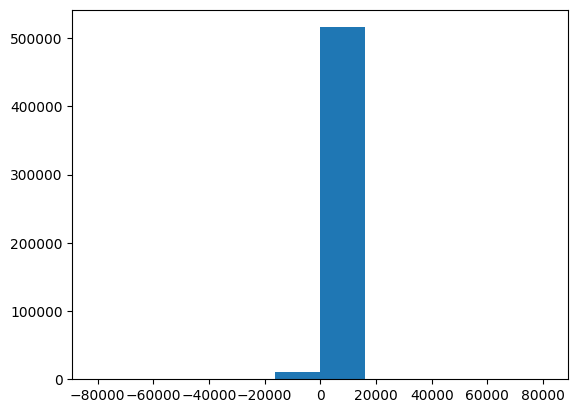

In [38]:
plt.hist(df['Quantity'])
plt.show()

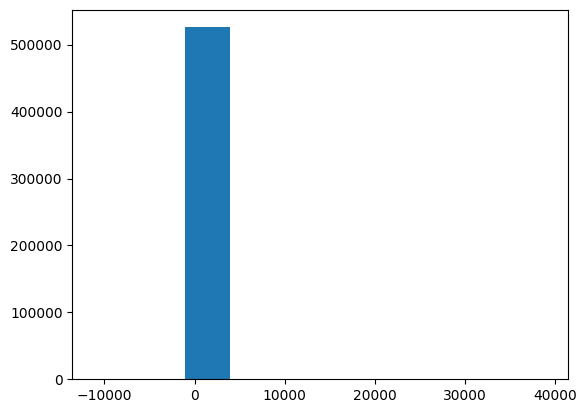

In [39]:
plt.hist(df['UnitPrice'])
plt.show()

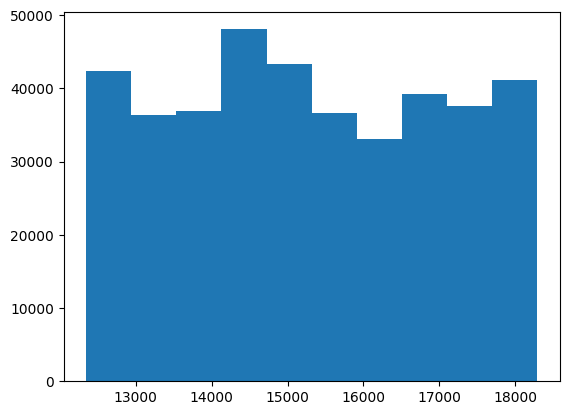

In [40]:
plt.hist(df['CustomerID'])
plt.show()

Yukarıda 3 adet sayısal gözlemlerimizin histogram tabloları verilmiştir bu tabloya bakarak bağzı çıkarımlarda bulunabiliriz;

* İlk olarak Quantity tablomuza baktığımızda verilerimizin yoğunluğu çoğunlukla 0 ile 10.000 arasında gösteriliyor yani ürün miktarımız bu arada yoğunlaşmıştır. Verimiz pozitif ve negatif çarpıklık sergiliyor ancak grafiğe baktığımızda daha çok pozitif yöne çarpık olduğunu görebiliyoruz.

* UnitPrice grafiğini incelediğimizde ise histogram grafiği 0 ile 1000 değerleri arasında yoğunlaşmıştır, bu çoğu ürünün fiyatının düşük olduğunu bize gösterir. Grafikte 40.000'e kadar çıkan uç değerler bulunmaktadır. Bu, belirli ürünlerin çok yüksek birim fiyatlara sahip olabileceğini veya veri hatası olabileceğini gösterebilir.Veri seti pozitif çarpıklık göstermektedir. Yani, verilerin büyük bir kısmı düşük birim fiyatlarda toplanırken, birkaç veri noktası oldukça yüksek birim fiyatlara sahiptir.

* Histogramda CustomerID değerlerinin neredeyse eşit bir şekilde dağıldığı gözlemlenmektedir. Çubukların boyutları birbirine oldukça yakındır, bu da müşteri kimliklerinin veritabanında düzenli bir şekilde yer aldığını gösterir. Müşteri kimlikleri genellikle ardışık veya yakın değerlerden oluşur. Bu, müşteri kimliklerinin düzenli ve tahmin edilebilir bir şekilde atandığını gösterebilir. 


In [41]:
# Kategorik bir değişkenin mode değeriyle doldurulması


df_fillna['StockCode'].isna().sum()


StockCode_mode = df_fillna['StockCode'].mode()


df_fillna['StockCode'] = df_fillna['StockCode'].fillna(value =StockCode_mode[0])


df_fillna.isna().sum()

InvoiceNo      15881
StockCode          0
Description    17584
Quantity           0
InvoiceDate    16099
UnitPrice          0
CustomerID         0
Country        16083
dtype: int64

In [42]:
df_fillna["InvoiceDate"].fillna(method = "ffill")

/tmp/ipykernel_17/3117209509.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["InvoiceDate"].fillna(method = "ffill")


0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: category
Categories (23144, object): ['1/10/2011 10:04', '1/10/2011 10:07', '1/10/2011 10:08', '1/10/2011 10:32', ..., '9/9/2011 9:03', '9/9/2011 9:13', '9/9/2011 9:38', '9/9/2011 9:52']

In [43]:
df_fillna.isna().sum()

InvoiceNo      15881
StockCode          0
Description    17584
Quantity           0
InvoiceDate    16099
UnitPrice          0
CustomerID         0
Country        16083
dtype: int64

In [44]:
df_fillna["Description"].fillna(method = "bfill")

/tmp/ipykernel_17/1769099914.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Description"].fillna(method = "bfill")


0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: category
Categories (4217, object): [' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE', ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK', ..., 'wrongly marked. 23343 in box', 'wrongly sold (22719) barcode', 'wrongly sold as sets', 'wrongly sold sets']

In [45]:
df_fillna.isna().sum()

InvoiceNo      15881
StockCode          0
Description    17584
Quantity           0
InvoiceDate    16099
UnitPrice          0
CustomerID         0
Country        16083
dtype: int64

## 3. Kategorik Değişken Analizi

In [46]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom


In [48]:
df_categorical["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [49]:
df_categorical["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [50]:
df_categorical["InvoiceNo"].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [51]:
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 25900 unique values in "InvoiceNo" categorical feature.

There are 4070 unique values in "StockCode" categorical feature.

There are 4223 unique values in "Description" categorical feature.

There are 23260 unique values in "InvoiceDate" categorical feature.

There are 38 unique values in "Country" categorical feature.



In [52]:
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64
 *********************************************
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64
 *********************************************
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE 

In [53]:
Country_categories = df["Country"].unique().tolist()[::-1]
Country_categories

['RSA',
 'Malta',
 'European Community',
 'USA',
 'Brazil',
 'Unspecified',
 'Canada',
 'Czech Republic',
 'Saudi Arabia',
 'United Arab Emirates',
 'Lebanon',
 'Singapore',
 'Hong Kong',
 'Greece',
 'Bahrain',
 'Finland',
 'Israel',
 'Austria',
 'Sweden',
 'Cyprus',
 'Denmark',
 'Channel Islands',
 'Iceland',
 'Japan',
 'Lithuania',
 'Belgium',
 'Italy',
 'Portugal',
 'Poland',
 'Spain',
 'Switzerland',
 'EIRE',
 'Norway',
 'Germany',
 'Netherlands',
 'Australia',
 'France',
 'United Kingdom']

In [54]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["Country"] = df["Country"].astype(CategoricalDtype(categories = Country_categories, ordered = True))

In [55]:
df["Country"].head()

0    United Kingdom
1    United Kingdom
2    United Kingdom
3    United Kingdom
4    United Kingdom
Name: Country, dtype: category
Categories (38, object): ['RSA' < 'Malta' < 'European Community' < 'USA' ... 'Netherlands' < 'Australia' < 'France' < 'United Kingdom']

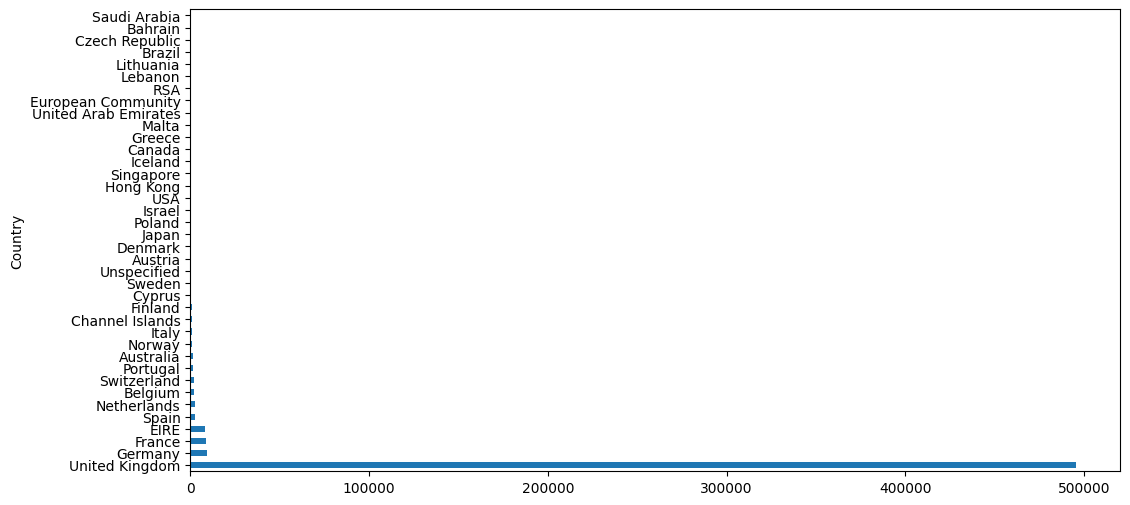

In [56]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot.barh();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


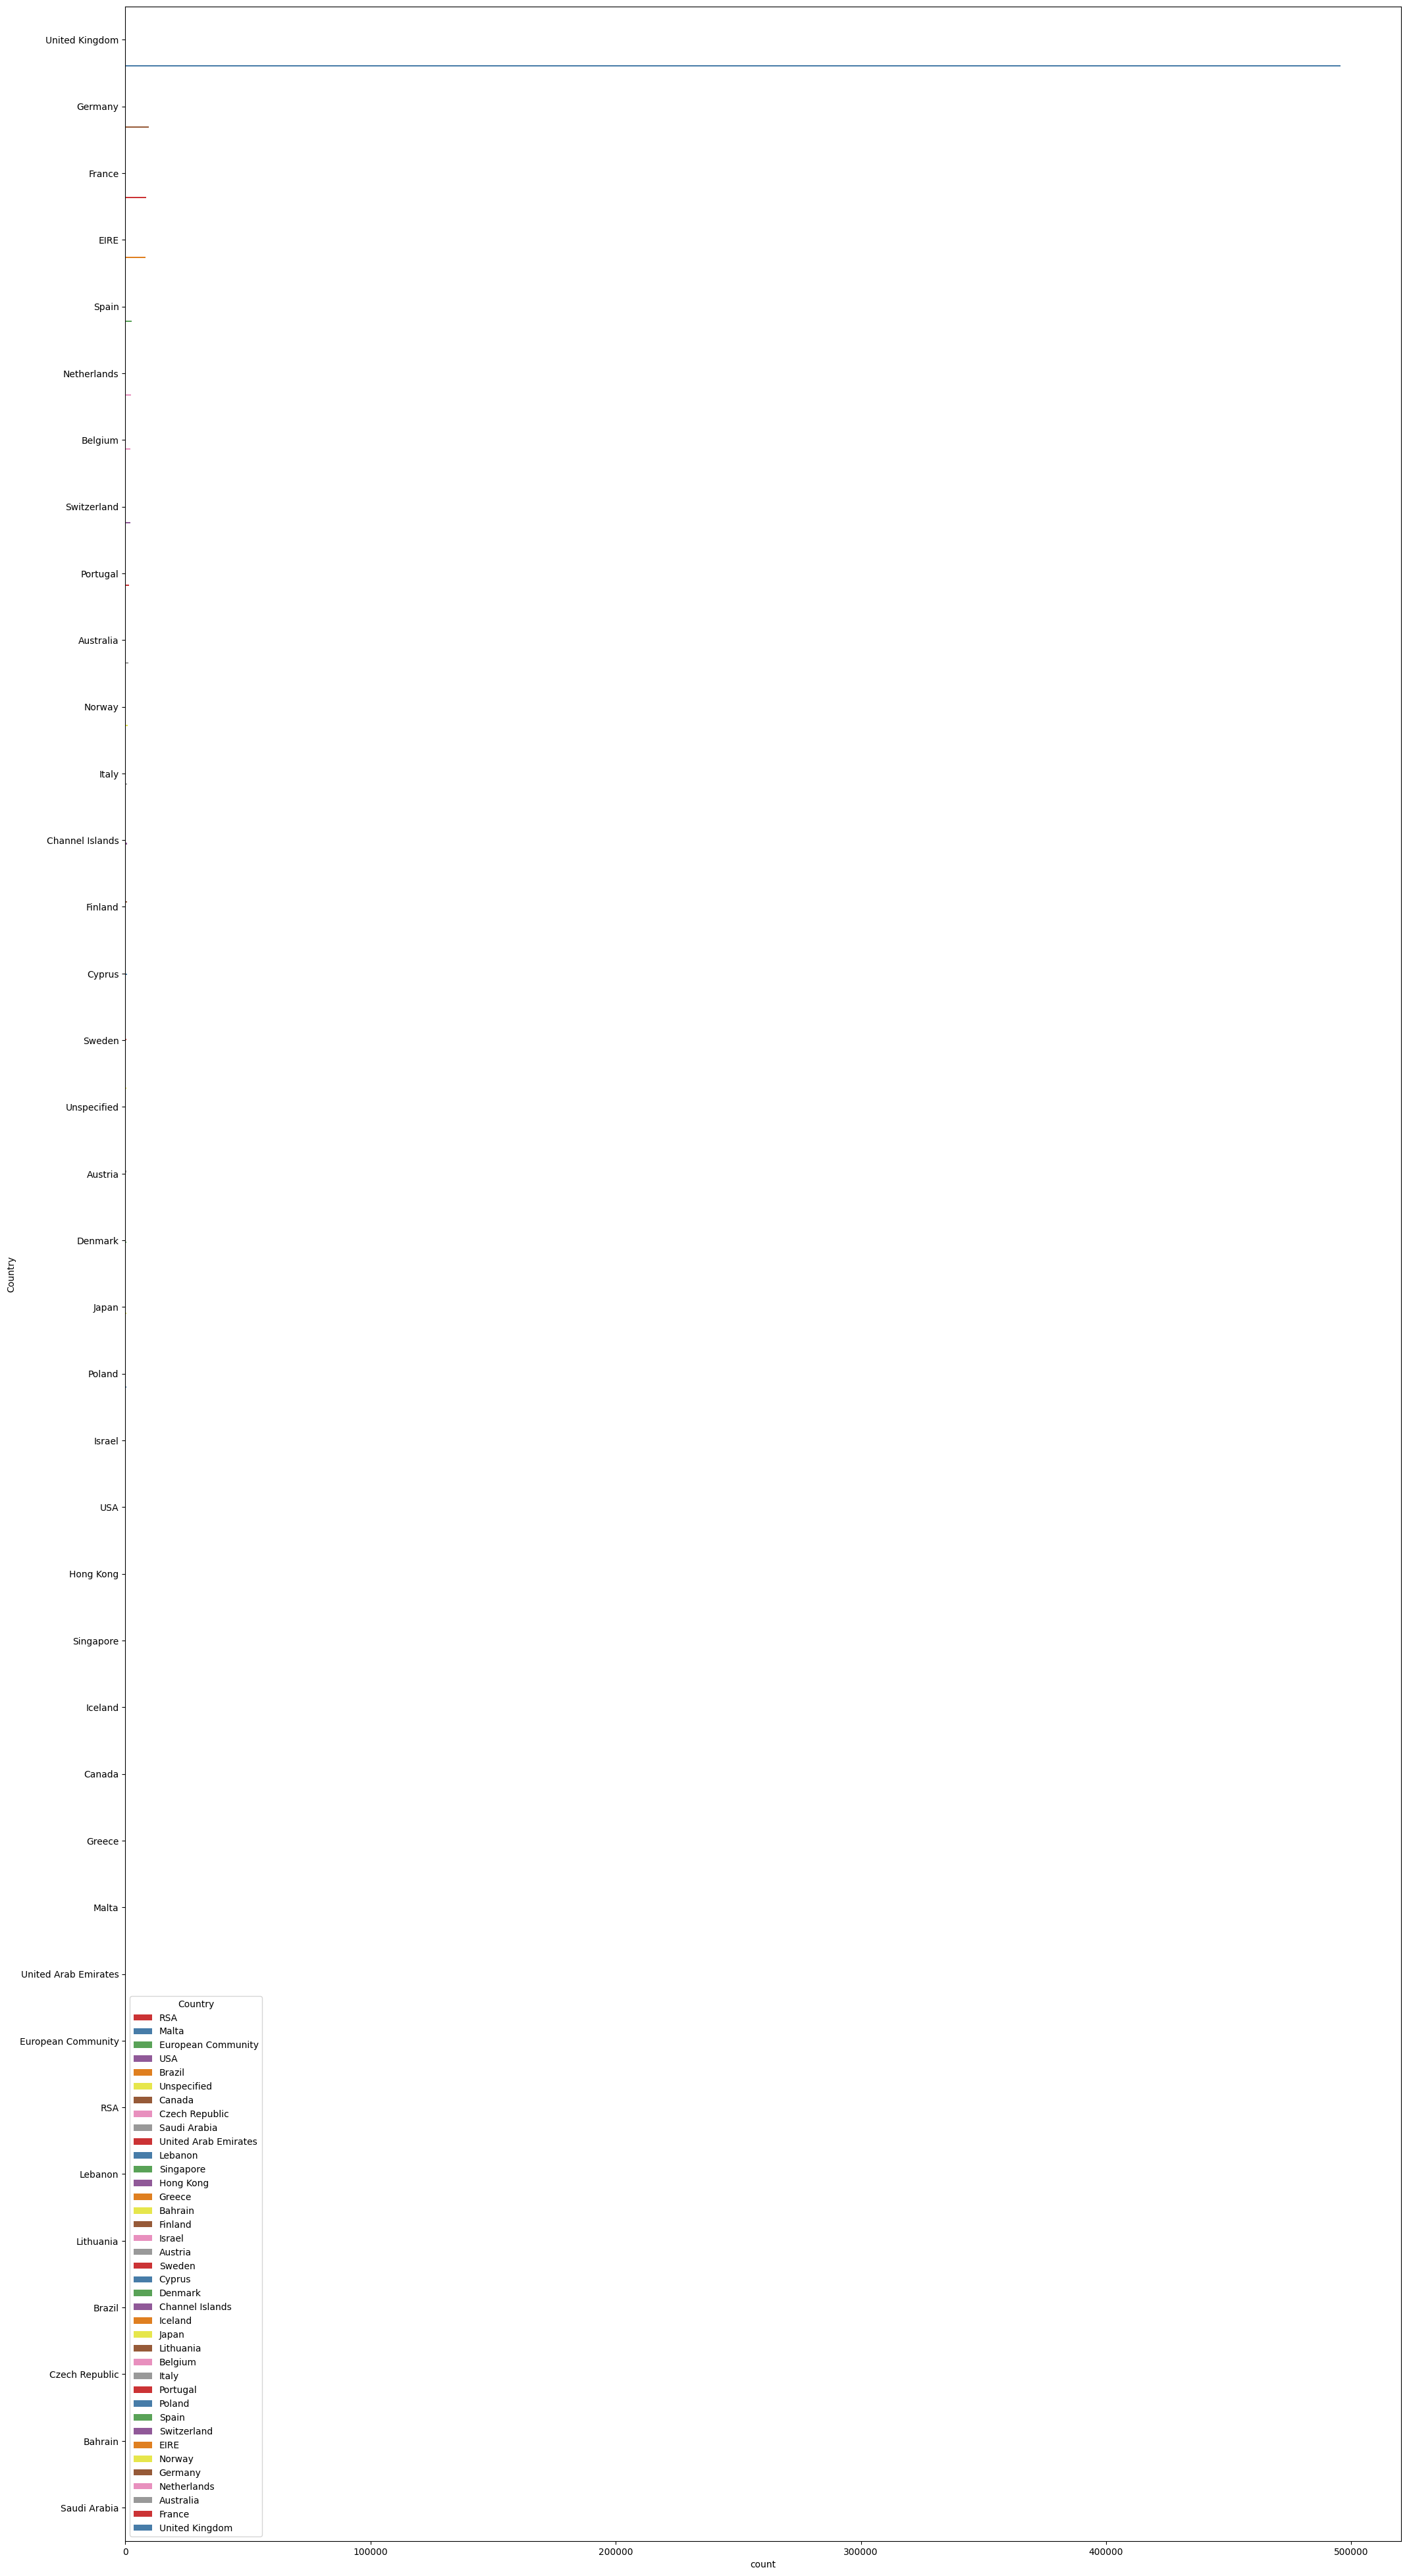

In [57]:
plt.figure(figsize=(25, 50))
sns.countplot(data = df,
              y = "Country",
              hue = "Country",
              order = df["Country"].value_counts().index,
              palette = "Set1");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


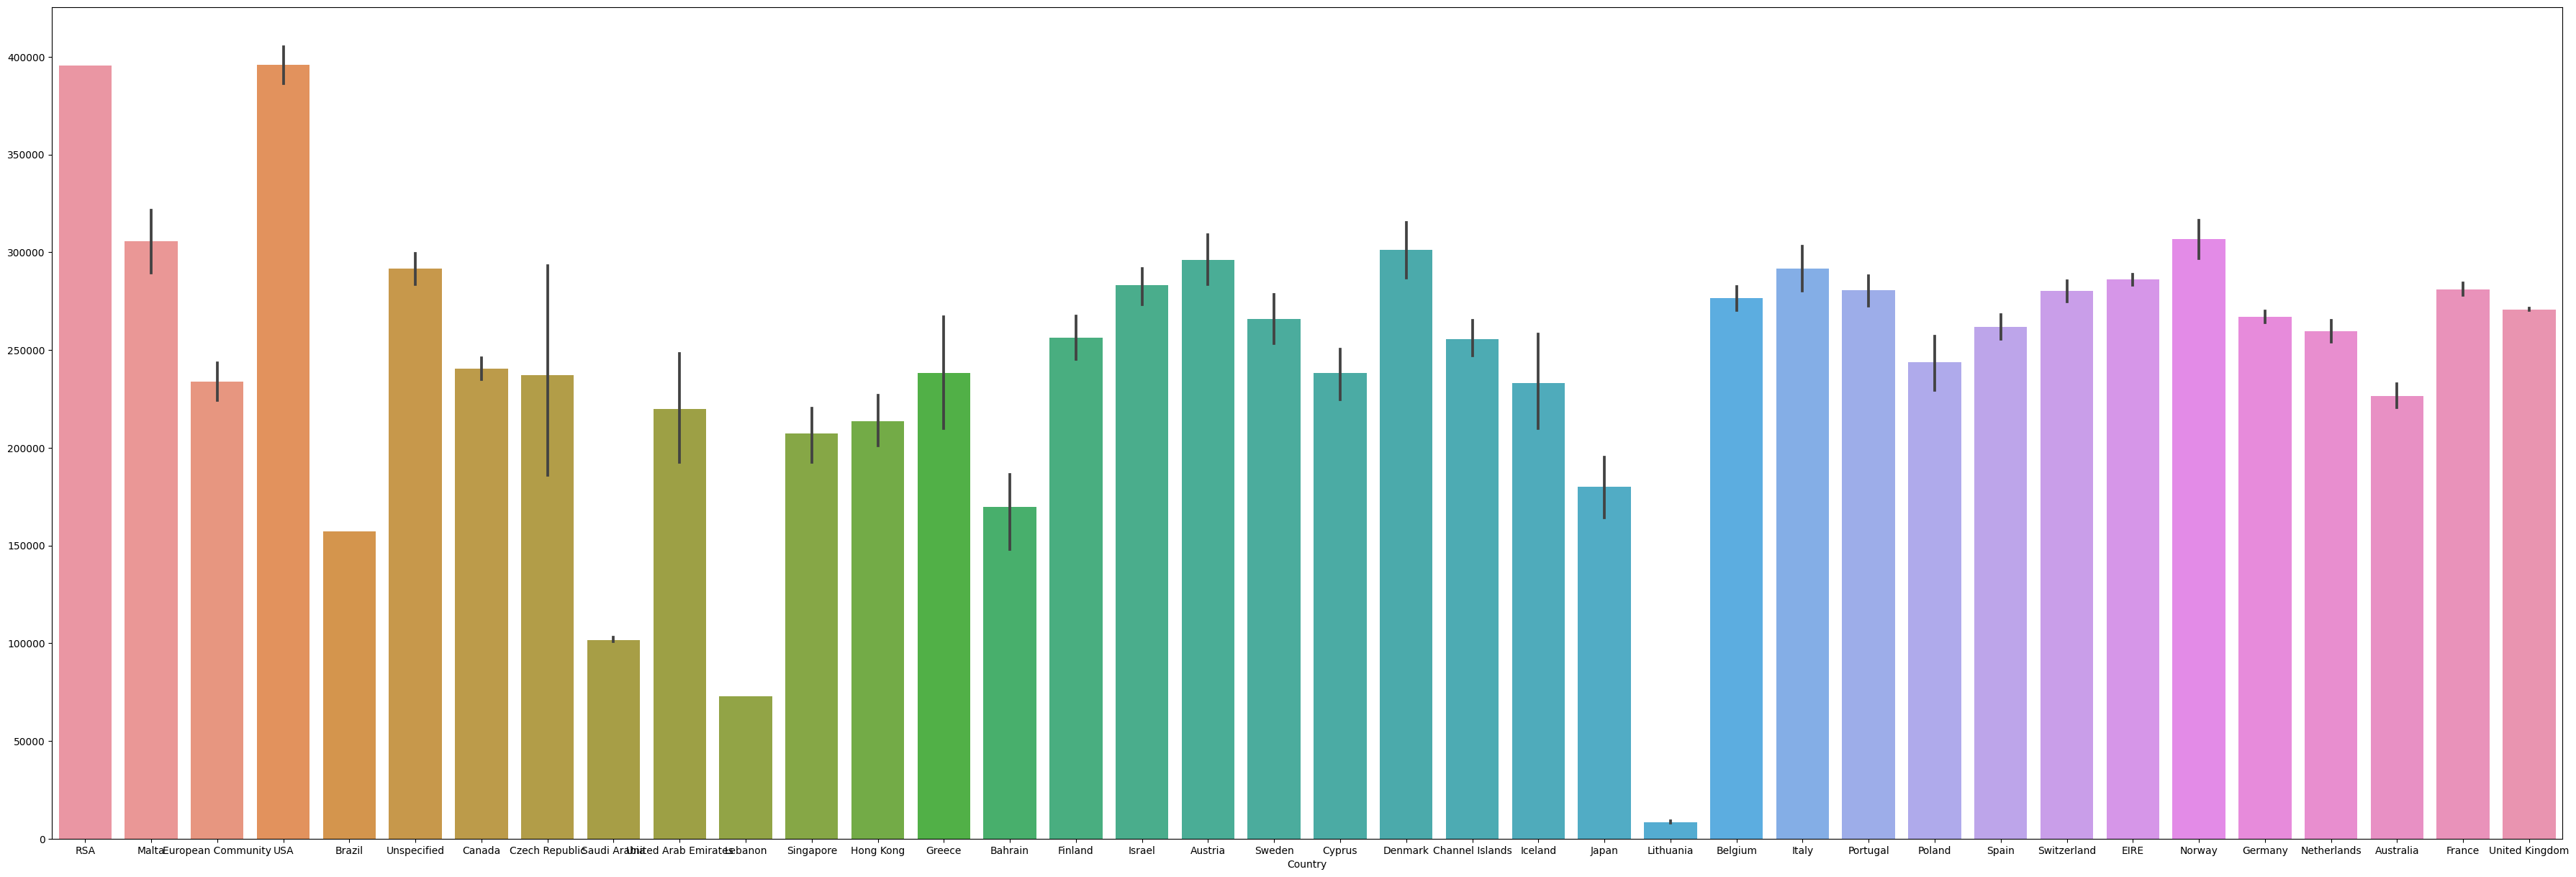

In [58]:
plt.figure(figsize=(45, 15))
sns.barplot(data = df, x = "Country", y = df.Country.index);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 5000x5000 with 0 Axes>

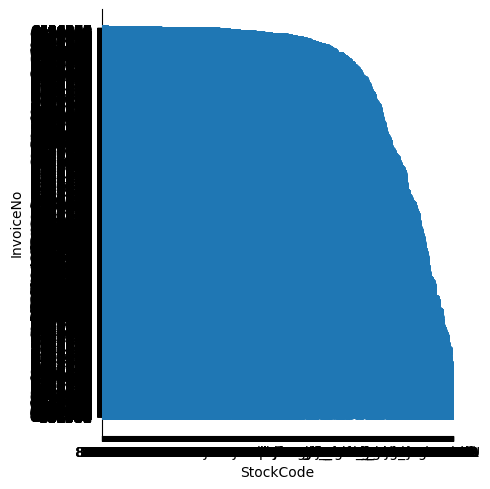

In [59]:
plt.figure(figsize=(50, 50))
sns.catplot(data = df,
            x = "StockCode",
            y = "InvoiceNo");